# Grover's algorithm

Summer of Science | Maths and Physics Club

Grover's algorithm is a quantum search algorithm that helps us find a specific item from an unsorted list much faster than a classical method. Normally, if we had to search through N possibilities, a classical algorithm would take around N steps in the worst case. But Grover's algorithm can do it in roughly √N steps using quantum amplitude amplification.

The idea is to start with all possibilities in superposition, then repeatedly apply two operations: one that flips the phase of the correct answer (the oracle), and one that amplifies its probability (the diffusion operator). After enough iterations, measuring the system gives the answer with high probability.

Ref:
- [But what is quantum computing? (Grover's Algorithm)](https://www.youtube.com/watch?v=RQWpF2Gb-gU&t=1098s&pp=ygULZ3JvdmVyIDNiMWI%3D)
- [Grover's algorithm IBM Quantum Platform](https://quantum.cloud.ibm.com/docs/en/tutorials/grovers-algorithm)
- [Quantum Algorithms : Grover's Search | NPTEL-NOC IITM](https://youtu.be/ZWCuQD-uIoY?si=LdGkavJrUbEo6fDu)

In [11]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
%matplotlib inline

Creating the Oracle for '11'

In [12]:
def grover_oracle(n):
    qc = QuantumCircuit(n)
    qc.cz(0, 1)  # flips the phase of '11' using controlled-Z
    return qc

Diffusion Operator

In [13]:
def grover_diffusion(n):
    qc = QuantumCircuit(n)
    qc.h(range(n))
    qc.x(range(n))
    qc.h(n - 1)
    qc.cx(0, 1)
    qc.h(n - 1)
    qc.x(range(n))
    qc.h(range(n))
    return qc

Building Grover Circuit

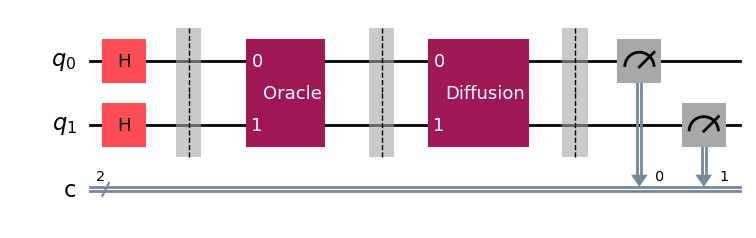

In [14]:
n = 2
qc = QuantumCircuit(n, n)

# putting both qubits into superposition
qc.h(range(n))
qc.barrier()

# marking the right answer using oracle (for 11 here)
qc.append(grover_oracle(n).to_gate(label="Oracle"), range(n))
qc.barrier()

# doing the amplitude boost part (diffusion)
qc.append(grover_diffusion(n).to_gate(label="Diffusion"), range(n))
qc.barrier()

# measuring both qubits
qc.measure(range(n), range(n))
qc.draw(output='mpl')
plt.show()


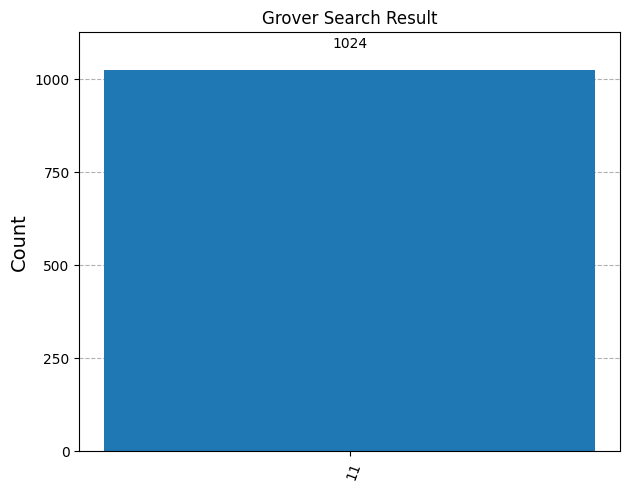

In [15]:
sim = AerSimulator()
qc_t = transpile(qc, sim)
job = sim.run(qc_t, shots=1024)
result = job.result()
counts = result.get_counts()

plot_histogram(counts)
plt.title("Grover Search Result")
plt.show()

Grover's algorithm successfully amplified the correct solution 11 from the superposition of all states. After one iteration of oracle and diffusion, measuring the circuit gave 11 with high probability, showing the power of quantum amplitude amplification.

Thank You